# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

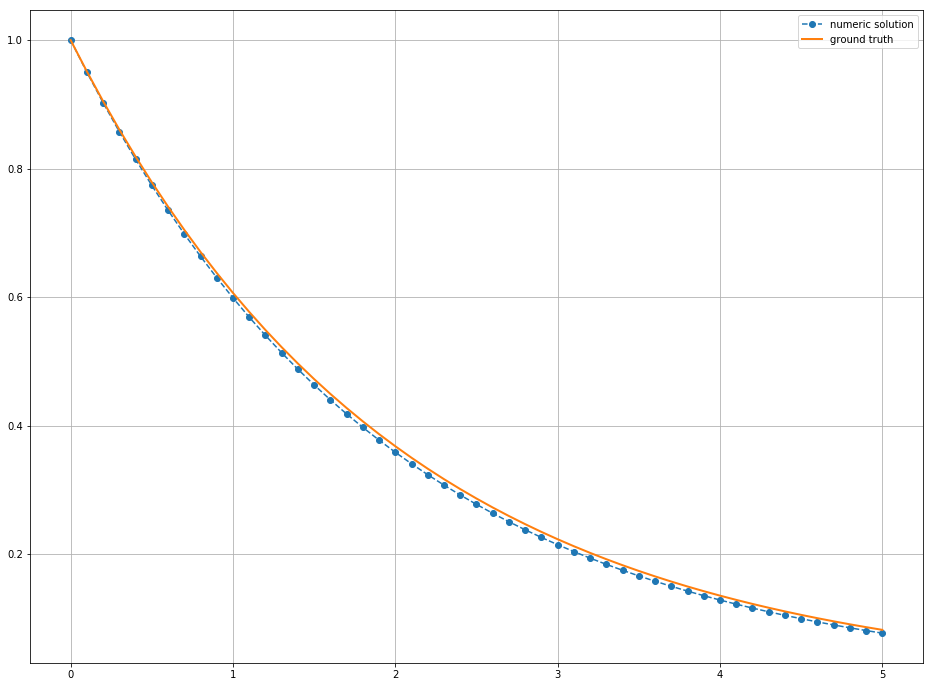

In [61]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.figure(figsize=(16,12))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Проверьте функцию выше, варьируя шаг $\tau$ (в коде это `dt`), $|\lambda| \tau > 1$.

(10% итоговой оценки)

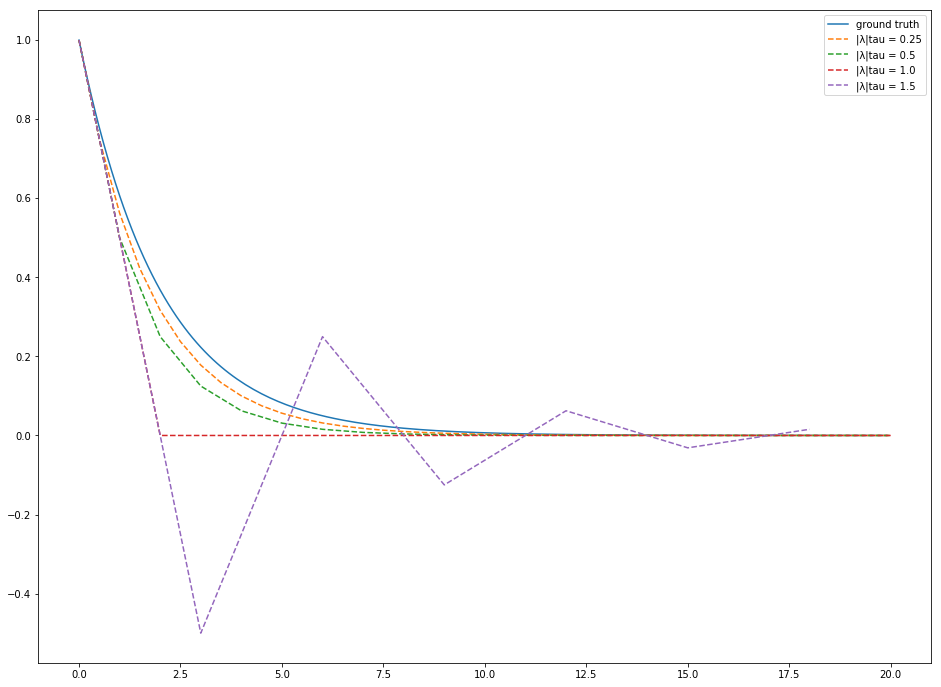

In [53]:
# ground truth
fig = plt.figure(figsize=(16,12))
plt.plot(np.arange(0,20,0.1), np.exp(lam*np.arange(0,20,0.1)), '-', label='ground truth')

# numeric solution
for step in np.array([0.5, 1, 2, 3]):
    t_n, u_n = euler_solve(lam, u0=1.0, T=20, dt=step)
    plt.plot(t_n, u_n, '--', label='|λ|tau = {}'.format(-lam*step))
    plt.legend()

plt.show()

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя невную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(10% итогвой оценки)!

Можно уже предугадать поведение кривых в обоих случаях при lambda < 0
Очевидно, что второй метод будет работать лучше при "опасных" значения

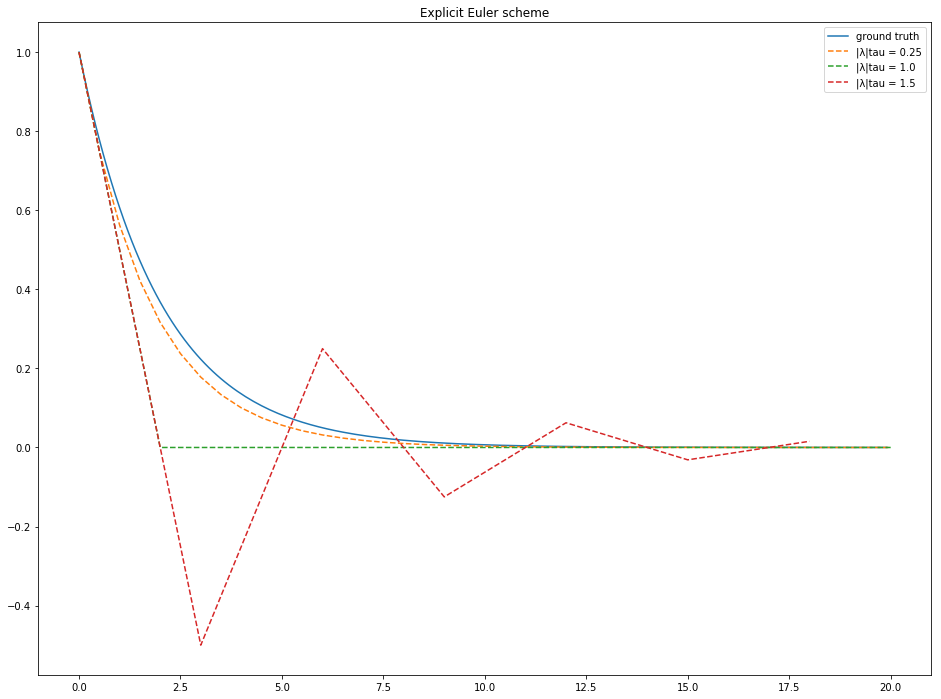

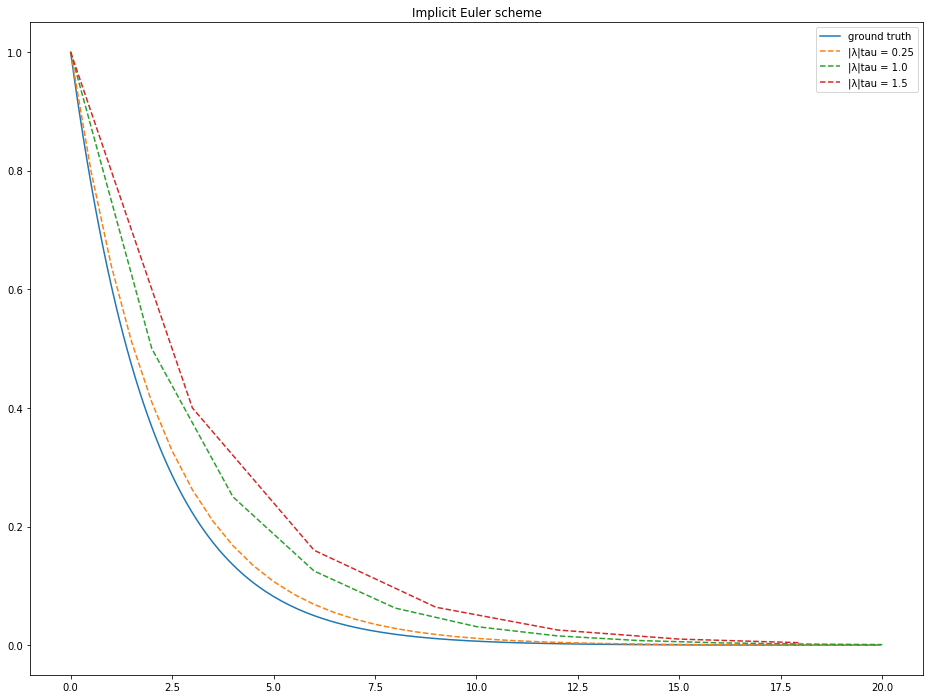

In [62]:
def Euler_implicit(lam, u0, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt
    u = np.zeros(t.shape[0])
    u[0] = u0
    for i in range(N):
        u[i + 1] = u[i] / (1 - lam * dt) 
    return t, u


# ground truth
fig = plt.figure(figsize=(16,12))
plt.plot(np.arange(0,20,0.1), np.exp(lam*np.arange(0,20,0.1)), '-', label='ground truth')


# numeric solution
for step in np.array([0.5, 2, 3]):
    t_n, u_n = euler_solve(lam, u0=1.0, T=20, dt=step)
    plt.plot(t_n, u_n, '--', label='|λ|tau = {}'.format(-lam*step))
    plt.legend()
    plt.title(r'Explicit Euler scheme')
plt.show()


# numeric solution
fig = plt.figure(figsize=(16,12))
plt.plot(np.arange(0,20,0.1), np.exp(lam*np.arange(0,20,0.1)), '-', label='ground truth')
for step in np.array([0.5, 2, 3]):
    t_n, u_n = Euler_implicit(lam, u0=1.0, T=20, dt=step)
    plt.plot(t_n, u_n, '--', label='|λ|tau = {}'.format(-lam*step))
    plt.legend()
    plt.title(r'Implicit Euler scheme')
plt.show()

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [153]:
def Euler_double(u0, A, T, dt):
    N = int(T/dt)
    t = np.arange(N+1)*dt 
    u = np.zeros((2,N+1)) 
    u[:, 0] = u0
    for i in range(N):
        u[:,i+1] = u[:,i] + dt * A @ u[:,i]    
    return t, u

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(20% итоговой оценки)

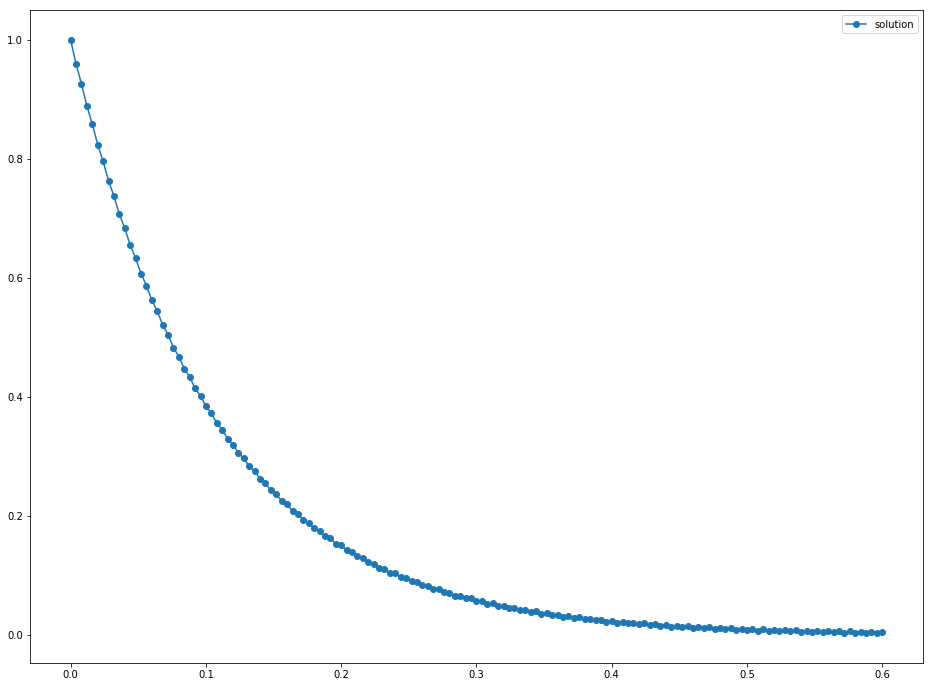

53.45902427704808


In [154]:
u0 = np.array([1, 0])
A = np.array([[-10, 10], [32, -499]])

t_a, u_a = Euler_double(u0, A, 0.6, 4e-3) 
fig = plt.figure(figsize=(16,12))
plt.plot(t_a, u_a[0], 'o-', label='solution')
plt.legend()
plt.show()

eigenvec = np.linalg.eigvals(A)
print(max(np.abs(eigenvec))/min(np.abs(eigenvec))) # If ratio > 1 , system is stiff. At this case we got ratio = 53

### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(20% итоговой оценки)

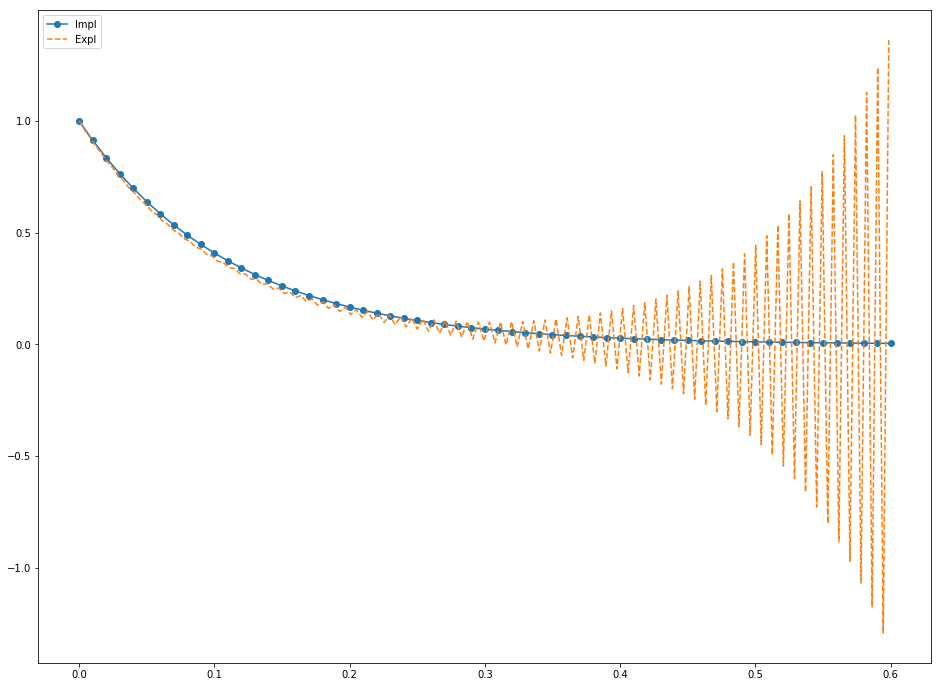

In [151]:
def Euler_double_imp(u0, A, T, dt):
    N = int(T/dt)
    t = np.arange(N+1)*dt 
    Matrix = np.eye(u0.shape[0]) - A*dt
    u = np.zeros((u0.shape[0], N+1))
    u[:,0] = u0
    for i in range(N):
        u[:,i+1] = np.linalg.solve(Matrix, u[:,i])
    return t, u


fig = plt.figure(figsize=(16,12))
t_ai, u_ai = Euler_double_imp(u0, A, 0.6, 0.01)
t_a, u_a = Euler_double(u0, A, 0.6, 0.0041) 
plt.plot(t_ai, u_ai[0], 'o-', label='Impl')
plt.plot(t_a, u_a[0], '--', label='Expl')
plt.legend()
plt.show()

# При меньшем шаге разбиения мы получили практически идентичную первой картину, следовательно второй метод лучше
# Однако при пактически таком же шаге разбиения , первый метод перестает работать

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера так, чтобы ответ захватывал хотя бы несколько периодов осциллятора. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

(20% итоговой оценки)

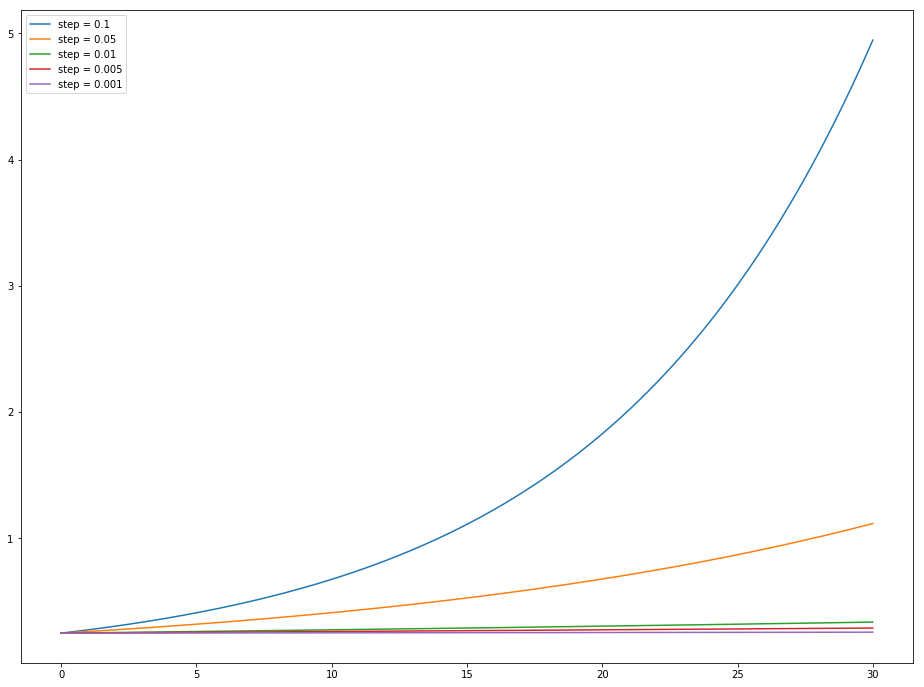

In [176]:
def Solver(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = []
    y.append(u0)
    for k in range(num_steps):
        y.append(y[k] + dt * A @ y[k])
    return tt, y


# Input
omega = 1
A = np.array([[0, -omega**2], [1, 0]])
u0 = np.array([[0.5],[0.5]])
E = lambda x: 0.5 * (x[0][0]**2 + (omega*x[1][0])**2)


# Plot & calc
fig = plt.figure(figsize=(16,12))
for step in [0.1, 0.05, 0.01, 0.005, 0.001]:
    t_h, u_h = solver(A, u0, T = 30, dt = step)
    E_h = [E(i) for i in u_h]
    plt.plot(t_h, E_h, label='step = {}'.format(step))

plt.legend()
plt.show()


# Из графика видно, в каких случаях энергия уходит на бесконечность

### Тест III.2

Реализуйте схему Рунге - Кутта второго порядка. Используте ее для решения того же уравнения с теми же шагами. Сравните решения, полученные методом Рунге - Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(20% итоговой оценки)

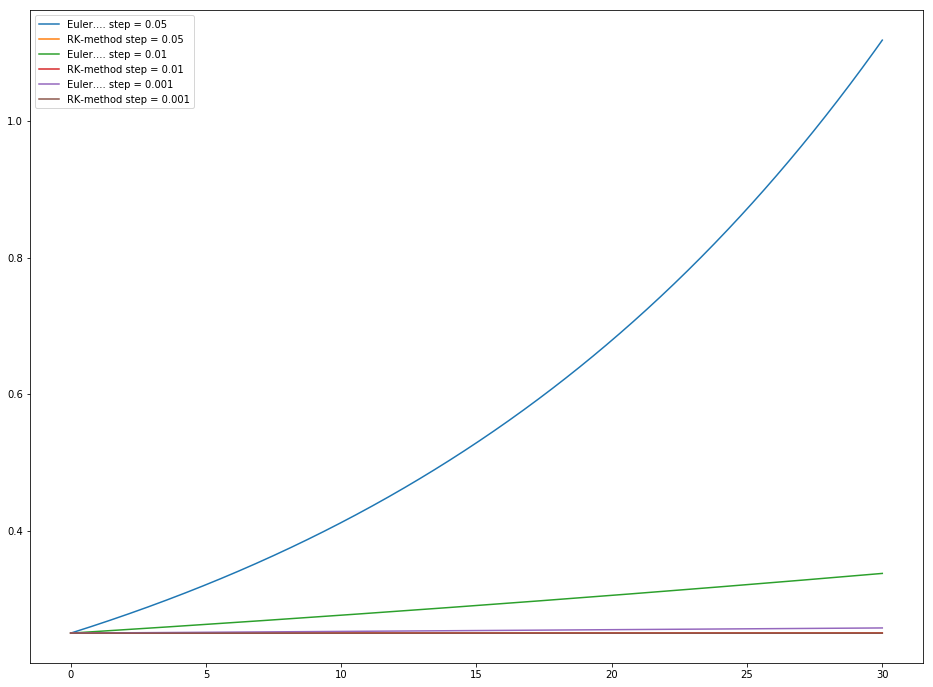

In [188]:
def RK_method (A, u0, T, dt):
    N = int(T/dt)
    t = np.arange(N+1)*dt
    y = []
    y.append(u0)
    for k in range(N):
        f = y[k] + 0.5 * dt * A @ y[k]
        y.append( y[k] + dt * A @ f)
    return t, y


# Plot & calc
fig = plt.figure(figsize=(16,12))
for step in [0.05, 0.01, 0.001]:
    t_h, u_h = solver(A, u0, T = 30, dt = step)
    t_rk, u_rk = RK_method(A, u0, T = 30, dt = step)
    E_h = [E(i) for i in u_h]
    E_rk = [E(i) for i in u_rk]
    plt.plot(t_h, E_h, label='Euler.... step = {}'.format(step))
    plt.plot(t_rk, E_rk, label='RK-method step = {}'.format(step))
    

plt.legend()
plt.show()